## <b>T-DISTRIBUTION<hr style="border:2.5px solid rgba(255, 0, 0, 1)"></hr>

<b>SHEDRACK URI DOJILLO</b><br>
T09<br>


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
df = pd.read_csv(r"dataset\transformer-voltage-10-sample.csv",
                 delimiter=',',
                 index_col=0)
df.head()

,Voltage
Sample,
1,118.3
2,119.2
3,119.7
4,119.5
5,120.0


In [17]:
alpha = 0.05
n = df['Voltage'].count()
t_critical = stats.t.ppf(1 - alpha/2,n-1)
t_critical

2.2621571628540993

In [23]:
n = df['Voltage'].count()
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

cl_lower, cl_upper = stats.t.interval(
    confidence=0.95,
    df = n-1,
    loc = df['Voltage'].mean(),
    scale = std/np.sqrt(n)
)

print("CI =", [cl_lower, cl_upper])

CI = [119.35862926677356, 120.86137073322641]


<function matplotlib.pyplot.show(close=None, block=None)>

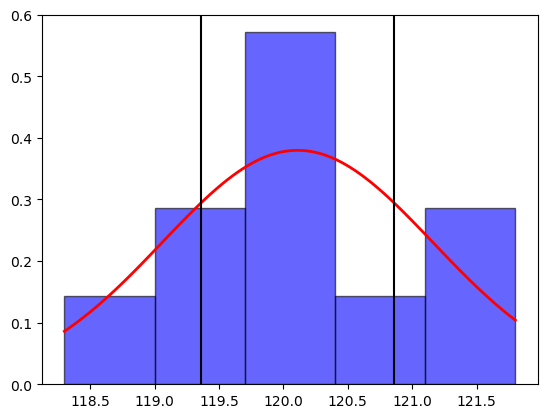

In [24]:
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p,
         linewidth = 2,
         color="red")

plt.hist(df['Voltage'],
         bins=5,
         density=True,
         edgecolor="black",
         alpha=0.6,
         color="blue")

plt.axvline(x=cl_lower,
            color="black",
            linestyle="-")

plt.axvline(x=cl_upper,
            color="black",
            linestyle="-")
plt.show